In [107]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
import random
from sklearn.manifold import TSNE
from torch.utils.data import Dataset, DataLoader
from sklearn.manifold import TSNE
import cv2

In [108]:
df_raw = pd.read_csv("seismic.csv", header=None)

df_raw.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0.0,0,0.005633,0.006864,0.019389,0.018201,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.004975,0.00500,1
1,0,0.0,0,0.003063,0.006200,0.011186,0.019272,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000,1
2,0,0.0,0,0.011065,0.037422,0.054437,0.145610,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.007463,0.00750,1
3,0,0.0,0,0.004831,0.012179,0.024609,0.047109,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000,1
4,0,0.0,1,0.024527,0.042737,0.017151,0.033191,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000,1
5,0,0.0,1,0.080072,0.135518,0.067114,0.122056,0.0,0.222222,0.250,0.000000,0.0,0,0,0,0,0.002488,0.00175,1
6,0,0.0,0,0.018836,0.042516,0.051454,0.099572,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.009950,0.01000,1
7,0,0.0,0,0.038562,0.066652,0.111857,0.158458,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000,1
8,0,0.0,1,0.095363,0.149026,0.074571,0.129550,0.0,0.111111,0.125,0.000000,0.0,0,0,0,0,0.001244,0.00125,1
9,0,0.0,0,0.016124,0.029451,0.042506,0.064240,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.012438,0.01250,1


In [109]:
device = "cpu"

In [110]:
y = pd.get_dummies(df_raw.iloc[:,-1:].astype(str))

y.head(40)

,18_-1,18_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [111]:
x = df_raw.iloc[:,:-1]

x.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0.0,0,0.005633,0.006864,0.019389,0.018201,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.004975,0.00500
1,0,0.0,0,0.003063,0.006200,0.011186,0.019272,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000
2,0,0.0,0,0.011065,0.037422,0.054437,0.145610,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.007463,0.00750
3,0,0.0,0,0.004831,0.012179,0.024609,0.047109,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000
4,0,0.0,1,0.024527,0.042737,0.017151,0.033191,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000
5,0,0.0,1,0.080072,0.135518,0.067114,0.122056,0.0,0.222222,0.250,0.000000,0.0,0,0,0,0,0.002488,0.00175
6,0,0.0,0,0.018836,0.042516,0.051454,0.099572,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.009950,0.01000
7,0,0.0,0,0.038562,0.066652,0.111857,0.158458,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.00000
8,0,0.0,1,0.095363,0.149026,0.074571,0.129550,0.0,0.111111,0.125,0.000000,0.0,0,0,0,0,0.001244,0.00125
9,0,0.0,0,0.016124,0.029451,0.042506,0.064240,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.012438,0.01250


In [112]:
x_raw, x_test, y_raw, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

positive_count = y_raw['18_1'][y_raw['18_1'] == 1].count()
negative_count = y_raw['18_-1'][y_raw['18_-1'] == 1].count()

print("1: ", positive_count)
print("-1: ", negative_count)

to_generate = positive_count - negative_count
print("Goal: Data to Generate for -1 is", to_generate)

1:  1791
-1:  102
Goal: Data to Generate for -1 is 1689


In [113]:
x_missing = x_raw[y_raw['18_-1'] == 1]

In [114]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, num_features=17, num_dim=18):
        super(VariationalAutoencoder, self).__init__()
        
        self.num_features = num_features
        self.num_dim = num_dim
        
        self.encoder_layer_1 = nn.Linear(in_features=self.num_dim, out_features=9)
        self.encoder_layer_2 = nn.Linear(in_features=9, out_features=(self.num_features * 2))
        
        self.decoder_layer_1 = nn.Linear(in_features=self.num_features, out_features=9)
        self.decoder_layer_2 = nn.Linear(in_features=9, out_features=self.num_dim)
        
        self.relu = nn.LeakyReLU() # hidden layers
        self.sigmoid = nn.Sigmoid() # output layer
        
    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.randn_like(std)  # `randn_like` as we need the same size
        sample = mu + (eps * std)    # sampling as if coming from the input space
        
        return sample
    
    def encode(self, x):
        # encoding
        #x = F.relu(self.encoder_layer_1(x))
        x = self.encoder_layer_1(x)
        x = self.relu(x)
        x = self.encoder_layer_2(x).view(-1, 2, self.num_features)
        
        # get `mu` and `log_var`
        mu = x[:, 0, :] # the first feature values as mean
        log_var = x[:, 1, :] # the other feature values as variance
        
        # get the latent vector through reparameterization
        z = self.reparameterize(mu, log_var)
        
        return z, mu, log_var
    
    def decode(self, z, mu, log_var):
        # decoding
        #x = F.relu(self.decoder_layer_1(z))
        x = self.decoder_layer_1(z)
        x = self.relu(x)
        
        #reconstruction = torch.sigmoid(self.decoder_layer_2(x))
        reconstruction = self.decoder_layer_2(x)
        reconstruction = self.sigmoid(reconstruction)
        
        return reconstruction, mu, log_var
    
    # Utility function to generate new data based on:
    # mu: The average that you want to have (should be the same size as num_features)
    # log_var: The variance that you want to have (should be the same size as num_features)
    def sample(self, mu, log_var):
        z = self.reparameterize(mu, log_var)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction
        
    
    def forward(self, x):
        z, mu, log_var = self.encode(x)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction, mu, log_var

In [115]:
class AutoencoderDataset(Dataset):
    def __init__(self, x):
        self.x = x
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.x[index]

In [116]:
def final_loss(bce_loss, mu, logvar):
    """
    This function will add the reconstruction loss (BCELoss) and the 
    KL-Divergence.
    KL-Divergence = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    :param bce_loss: recontruction loss
    :param mu: the mean from the latent vector
    :param logvar: log variance from the latent vector
    """
    BCE = bce_loss 
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [117]:
num_features = 17
model = VariationalAutoencoder(num_features=num_features)

In [118]:
learning_rate = 0.0001
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [119]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        reconstruction, mu, logvar = model.forward(data)
        
        loss = loss_fn(reconstruction, targets)
        
        loss = final_loss(loss, mu, logvar)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [120]:
x_missing = torch.Tensor(np.array(x_missing))

# use Dataloader for Autoencoder 
custom_dataset = AutoencoderDataset(x_missing)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [121]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    # torch.save(state, "variational-autoencoder.pth")

Epoch: 0


100%|██████████| 21/21 [00:00<00:00, 283.81it/s, loss=1.86]


Ave Loss: 3.7214279288337346
Epoch: 1


100%|██████████| 21/21 [00:00<00:00, 403.84it/s, loss=1.81]


Ave Loss: 3.5549152181262063
Epoch: 2


100%|██████████| 21/21 [00:00<00:00, 428.38it/s, loss=1.78]


Ave Loss: 3.4052187374659946
Epoch: 3


100%|██████████| 21/21 [00:00<00:00, 381.80it/s, loss=1.74]


Ave Loss: 3.2690592947460355
Epoch: 4


100%|██████████| 21/21 [00:00<00:00, 411.76it/s, loss=1.71]


Ave Loss: 3.1471818571998957
Epoch: 5


100%|██████████| 21/21 [00:00<00:00, 411.80it/s, loss=1.68]


Ave Loss: 3.0342179366520474
Epoch: 6


100%|██████████| 21/21 [00:00<00:00, 403.63it/s, loss=1.65]


Ave Loss: 2.930552431515285
Epoch: 7


100%|██████████| 21/21 [00:00<00:00, 396.21it/s, loss=1.62]


Ave Loss: 2.8353980836414157
Epoch: 8


100%|██████████| 21/21 [00:00<00:00, 375.03it/s, loss=1.6]


Ave Loss: 2.747038205464681
Epoch: 9


100%|██████████| 21/21 [00:00<00:00, 349.89it/s, loss=1.58]


Ave Loss: 2.6635325863247825
Epoch: 10


100%|██████████| 21/21 [00:00<00:00, 385.41it/s, loss=1.55]


Ave Loss: 2.585906221753075
Epoch: 11


100%|██████████| 21/21 [00:00<00:00, 431.73it/s, loss=1.53]


Ave Loss: 2.513697624206543
Epoch: 12


100%|██████████| 21/21 [00:00<00:00, 437.75it/s, loss=1.51]


Ave Loss: 2.445845229285104
Epoch: 13


100%|██████████| 21/21 [00:00<00:00, 455.63it/s, loss=1.49]


Ave Loss: 2.379992138771784
Epoch: 14


100%|██████████| 21/21 [00:00<00:00, 460.32it/s, loss=1.47]


Ave Loss: 2.3198044413612005
Epoch: 15


100%|██████████| 21/21 [00:00<00:00, 452.13it/s, loss=1.45]


Ave Loss: 2.2612887961523875
Epoch: 16


100%|██████████| 21/21 [00:00<00:00, 453.55it/s, loss=1.44]


Ave Loss: 2.20648988087972
Epoch: 17


100%|██████████| 21/21 [00:00<00:00, 421.16it/s, loss=1.42]


Ave Loss: 2.153489453451974
Epoch: 18


100%|██████████| 21/21 [00:00<00:00, 400.75it/s, loss=1.41]


Ave Loss: 2.103952850614275
Epoch: 19


100%|██████████| 21/21 [00:00<00:00, 384.17it/s, loss=1.39]


Ave Loss: 2.05607807636261
Epoch: 20


100%|██████████| 21/21 [00:00<00:00, 315.09it/s, loss=1.37]


Ave Loss: 2.0098354532605125
Epoch: 21


100%|██████████| 21/21 [00:00<00:00, 414.36it/s, loss=1.36]


Ave Loss: 1.9666966143108549
Epoch: 22


100%|██████████| 21/21 [00:00<00:00, 391.40it/s, loss=1.34]


Ave Loss: 1.924199064572652
Epoch: 23


100%|██████████| 21/21 [00:00<00:00, 425.29it/s, loss=1.32]


Ave Loss: 1.8833681912649245
Epoch: 24


100%|██████████| 21/21 [00:00<00:00, 411.09it/s, loss=1.31]


Ave Loss: 1.8452354612804593
Epoch: 25


100%|██████████| 21/21 [00:00<00:00, 375.66it/s, loss=1.3]


Ave Loss: 1.8072320904050554
Epoch: 26


100%|██████████| 21/21 [00:00<00:00, 413.94it/s, loss=1.29]


Ave Loss: 1.7729892446881248
Epoch: 27


100%|██████████| 21/21 [00:00<00:00, 431.91it/s, loss=1.27]


Ave Loss: 1.7365241448084514
Epoch: 28


100%|██████████| 21/21 [00:00<00:00, 452.12it/s, loss=1.25]


Ave Loss: 1.7034971657253446
Epoch: 29


100%|██████████| 21/21 [00:00<00:00, 409.46it/s, loss=1.25]


Ave Loss: 1.670616694859096
Epoch: 30


100%|██████████| 21/21 [00:00<00:00, 428.56it/s, loss=1.23]


Ave Loss: 1.639031591869536
Epoch: 31


100%|██████████| 21/21 [00:00<00:00, 442.32it/s, loss=1.22]


Ave Loss: 1.6102200803302584
Epoch: 32


100%|██████████| 21/21 [00:00<00:00, 334.50it/s, loss=1.23]


Ave Loss: 1.5807356039683025
Epoch: 33


100%|██████████| 21/21 [00:00<00:00, 373.31it/s, loss=1.2]


Ave Loss: 1.5530257452101934
Epoch: 34


100%|██████████| 21/21 [00:00<00:00, 433.46it/s, loss=1.19]


Ave Loss: 1.5255454721904935
Epoch: 35


100%|██████████| 21/21 [00:00<00:00, 436.63it/s, loss=1.17]


Ave Loss: 1.498674409730094
Epoch: 36


100%|██████████| 21/21 [00:00<00:00, 436.77it/s, loss=1.17]


Ave Loss: 1.4747846296855383
Epoch: 37


100%|██████████| 21/21 [00:00<00:00, 435.13it/s, loss=1.15]


Ave Loss: 1.4489610592524211
Epoch: 38


100%|██████████| 21/21 [00:00<00:00, 420.80it/s, loss=1.15]


Ave Loss: 1.4276543344770158
Epoch: 39


100%|██████████| 21/21 [00:00<00:00, 444.40it/s, loss=1.15]


Ave Loss: 1.4034322386696225
Epoch: 40


100%|██████████| 21/21 [00:00<00:00, 428.94it/s, loss=1.13]


Ave Loss: 1.3818113860629855
Epoch: 41


100%|██████████| 21/21 [00:00<00:00, 428.35it/s, loss=1.13]


Ave Loss: 1.3607833101635887
Epoch: 42


100%|██████████| 21/21 [00:00<00:00, 453.19it/s, loss=1.11]


Ave Loss: 1.3374201002575101
Epoch: 43


100%|██████████| 21/21 [00:00<00:00, 453.20it/s, loss=1.1]


Ave Loss: 1.3214314381281536
Epoch: 44


100%|██████████| 21/21 [00:00<00:00, 464.50it/s, loss=1.08]


Ave Loss: 1.3026162499473208
Epoch: 45


100%|██████████| 21/21 [00:00<00:00, 445.78it/s, loss=1.09]


Ave Loss: 1.2836613768622989
Epoch: 46


100%|██████████| 21/21 [00:00<00:00, 439.07it/s, loss=1.08]


Ave Loss: 1.2645191238040017
Epoch: 47


100%|██████████| 21/21 [00:00<00:00, 442.09it/s, loss=1.09]


Ave Loss: 1.247593601544698
Epoch: 48


100%|██████████| 21/21 [00:00<00:00, 462.79it/s, loss=1.07]


Ave Loss: 1.2332385664894467
Epoch: 49


100%|██████████| 21/21 [00:00<00:00, 459.44it/s, loss=1.06]


Ave Loss: 1.2161305461611067
Epoch: 50


100%|██████████| 21/21 [00:00<00:00, 437.01it/s, loss=1.06]


Ave Loss: 1.1997501679829188
Epoch: 51


100%|██████████| 21/21 [00:00<00:00, 451.31it/s, loss=1.04]


Ave Loss: 1.1846638747623988
Epoch: 52


100%|██████████| 21/21 [00:00<00:00, 459.92it/s, loss=1.03]


Ave Loss: 1.1717973436628069
Epoch: 53


100%|██████████| 21/21 [00:00<00:00, 468.79it/s, loss=1.03]


Ave Loss: 1.157943186305818
Epoch: 54


100%|██████████| 21/21 [00:00<00:00, 456.54it/s, loss=1.04]


Ave Loss: 1.1463854539962042
Epoch: 55


100%|██████████| 21/21 [00:00<00:00, 455.36it/s, loss=1.04]


Ave Loss: 1.1328823566436768
Epoch: 56


100%|██████████| 21/21 [00:00<00:00, 448.56it/s, loss=1.02]


Ave Loss: 1.1174641450246174
Epoch: 57


100%|██████████| 21/21 [00:00<00:00, 446.82it/s, loss=1.02]


Ave Loss: 1.1061366626194544
Epoch: 58


100%|██████████| 21/21 [00:00<00:00, 456.54it/s, loss=1]


Ave Loss: 1.0960223447708857
Epoch: 59


100%|██████████| 21/21 [00:00<00:00, 443.63it/s, loss=1.02]


Ave Loss: 1.0871849003292264
Epoch: 60


100%|██████████| 21/21 [00:00<00:00, 448.82it/s, loss=0.967]


Ave Loss: 1.076267225401742
Epoch: 61


100%|██████████| 21/21 [00:00<00:00, 455.98it/s, loss=1.01]


Ave Loss: 1.0674481562205724
Epoch: 62


100%|██████████| 21/21 [00:00<00:00, 445.86it/s, loss=0.995]


Ave Loss: 1.0562220215797424
Epoch: 63


100%|██████████| 21/21 [00:00<00:00, 477.08it/s, loss=0.98]


Ave Loss: 1.0464237928390503
Epoch: 64


100%|██████████| 21/21 [00:00<00:00, 466.41it/s, loss=0.953]


Ave Loss: 1.0346823788824535
Epoch: 65


100%|██████████| 21/21 [00:00<00:00, 455.59it/s, loss=0.971]


Ave Loss: 1.026559659412929
Epoch: 66


100%|██████████| 21/21 [00:00<00:00, 464.60it/s, loss=0.999]


Ave Loss: 1.0196736114365714
Epoch: 67


100%|██████████| 21/21 [00:00<00:00, 465.94it/s, loss=0.983]


Ave Loss: 1.014761902037121
Epoch: 68


100%|██████████| 21/21 [00:00<00:00, 456.91it/s, loss=0.942]


Ave Loss: 1.0043578829084123
Epoch: 69


100%|██████████| 21/21 [00:00<00:00, 435.72it/s, loss=0.939]


Ave Loss: 0.9976883445467267
Epoch: 70


100%|██████████| 21/21 [00:00<00:00, 436.25it/s, loss=0.957]


Ave Loss: 0.9889481351489112
Epoch: 71


100%|██████████| 21/21 [00:00<00:00, 446.31it/s, loss=0.952]


Ave Loss: 0.9860751912707374
Epoch: 72


100%|██████████| 21/21 [00:00<00:00, 456.51it/s, loss=0.911]


Ave Loss: 0.9737827266965594
Epoch: 73


100%|██████████| 21/21 [00:00<00:00, 462.15it/s, loss=0.922]


Ave Loss: 0.9739133488564264
Epoch: 74


100%|██████████| 21/21 [00:00<00:00, 390.00it/s, loss=0.918]


Ave Loss: 0.9642900625864664
Epoch: 75


100%|██████████| 21/21 [00:00<00:00, 434.34it/s, loss=0.958]


Ave Loss: 0.9621048370997111
Epoch: 76


100%|██████████| 21/21 [00:00<00:00, 458.65it/s, loss=0.926]


Ave Loss: 0.9545134958766756
Epoch: 77


100%|██████████| 21/21 [00:00<00:00, 450.95it/s, loss=0.957]


Ave Loss: 0.9527057835033962
Epoch: 78


100%|██████████| 21/21 [00:00<00:00, 441.51it/s, loss=0.934]


Ave Loss: 0.9440771171024868
Epoch: 79


100%|██████████| 21/21 [00:00<00:00, 443.41it/s, loss=0.921]


Ave Loss: 0.9408564624332246
Epoch: 80


100%|██████████| 21/21 [00:00<00:00, 446.80it/s, loss=0.907]


Ave Loss: 0.9312106626374381
Epoch: 81


100%|██████████| 21/21 [00:00<00:00, 461.22it/s, loss=0.911]


Ave Loss: 0.9294206443287077
Epoch: 82


100%|██████████| 21/21 [00:00<00:00, 436.60it/s, loss=0.932]


Ave Loss: 0.9267334654217675
Epoch: 83


100%|██████████| 21/21 [00:00<00:00, 473.25it/s, loss=0.928]


Ave Loss: 0.9223502363477435
Epoch: 84


100%|██████████| 21/21 [00:00<00:00, 437.85it/s, loss=0.921]


Ave Loss: 0.9183997625396365
Epoch: 85


100%|██████████| 21/21 [00:00<00:00, 434.42it/s, loss=0.937]


Ave Loss: 0.912938328016372
Epoch: 86


100%|██████████| 21/21 [00:00<00:00, 418.18it/s, loss=0.909]


Ave Loss: 0.908976830187298
Epoch: 87


100%|██████████| 21/21 [00:00<00:00, 425.80it/s, loss=0.928]


Ave Loss: 0.9039024313290914
Epoch: 88


100%|██████████| 21/21 [00:00<00:00, 412.62it/s, loss=0.901]


Ave Loss: 0.9013762303761074
Epoch: 89


100%|██████████| 21/21 [00:00<00:00, 427.30it/s, loss=0.897]


Ave Loss: 0.8962937196095785
Epoch: 90


100%|██████████| 21/21 [00:00<00:00, 391.74it/s, loss=0.897]


Ave Loss: 0.8906144130797613
Epoch: 91


100%|██████████| 21/21 [00:00<00:00, 379.59it/s, loss=0.895]


Ave Loss: 0.8869962380045936
Epoch: 92


100%|██████████| 21/21 [00:00<00:00, 427.99it/s, loss=0.885]


Ave Loss: 0.8893950240952628
Epoch: 93


100%|██████████| 21/21 [00:00<00:00, 425.96it/s, loss=0.893]


Ave Loss: 0.8834098747798375
Epoch: 94


100%|██████████| 21/21 [00:00<00:00, 443.65it/s, loss=0.868]


Ave Loss: 0.8824170544033959
Epoch: 95


100%|██████████| 21/21 [00:00<00:00, 450.21it/s, loss=0.903]


Ave Loss: 0.8766856846355257
Epoch: 96


100%|██████████| 21/21 [00:00<00:00, 444.67it/s, loss=0.868]


Ave Loss: 0.8767493736176264
Epoch: 97


100%|██████████| 21/21 [00:00<00:00, 454.13it/s, loss=0.863]


Ave Loss: 0.8730927393549964
Epoch: 98


100%|██████████| 21/21 [00:00<00:00, 446.82it/s, loss=0.877]


Ave Loss: 0.8721990812392462
Epoch: 99


100%|██████████| 21/21 [00:00<00:00, 457.30it/s, loss=0.869]

Ave Loss: 0.8676002564884367


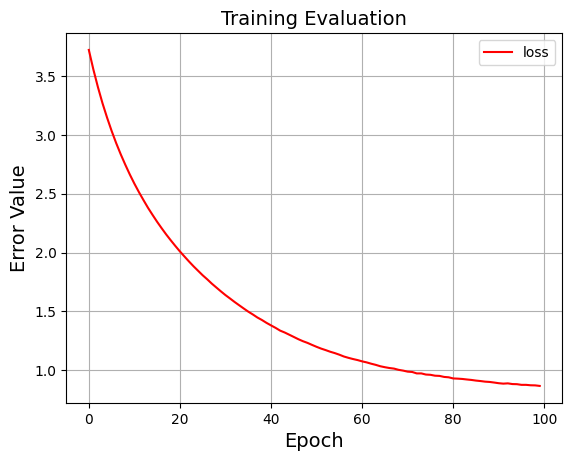

In [122]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [123]:
# Create a vector of zero tensors representing 0 average per num_feature (right in the middle of the dist)
sampled_mu = torch.Tensor([np.zeros(num_features)])

# Create a vector of zero tensors representing 0 standard deviations away from the mean to create variations
# Change this is you want to sample away from the mean to create "off-quality" data
sampled_logvar = torch.Tensor([np.zeros(num_features)])

# print(sampled_logvar)

sampled_logvar.shape

torch.Size([1, 17])

In [124]:
# Grab a reconstructed sample from the trained model
# NOTE: reconstruction returns as an array because it's possible to have multiple predictions later on
reconstruction = model.sample(sampled_mu, sampled_logvar)
reconstruction

tensor([[0.3639, 0.3710, 0.5302, 0.1690, 0.2857, 0.2299, 0.4045, 0.3922, 0.4298,
         0.3515, 0.2655, 0.2231, 0.3756, 0.3928, 0.3645, 0.3389, 0.4146, 0.1851]],
       grad_fn=<SigmoidBackward0>)

In [125]:
x_fab = x_raw
x_fab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1388,0,0.0,0,0.002751,0.064880,0.049963,0.087794,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.0000
623,0,0.0,1,0.028445,0.020372,0.030574,0.021413,0.0,0.111111,0.000,0.142857,0.0,0,0,0,0,0.002488,0.0025
1716,0,0.0,0,0.000836,0.016829,0.010440,0.028908,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.0000
1781,1,0.5,1,0.023267,0.174048,0.167785,0.177730,0.5,0.111111,0.125,0.000000,0.0,0,0,0,0,0.001493,0.0015
1443,1,0.5,1,0.007393,0.189770,0.033557,0.076017,0.0,0.111111,0.125,0.000000,0.0,0,0,0,0,0.000498,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0,0.5,0,0.002828,0.028344,0.052200,0.056745,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.0000
905,1,0.0,1,0.011909,0.112932,0.105145,0.110278,0.0,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.0000
1096,0,0.5,1,0.007397,0.112267,0.116331,0.176660,0.5,0.000000,0.000,0.000000,0.0,0,0,0,0,0.000000,0.0000
235,0,0.0,1,0.041036,0.120461,0.090977,0.148822,0.0,0.666667,0.250,0.571429,0.0,0,0,0,0,0.051741,0.0175


In [126]:
added_negative_data = []

for i in range(to_generate):
    reconstruction = model.sample(sampled_mu, sampled_logvar)
    reconstruction = added_negative_data.append(reconstruction[0].detach().cpu().numpy())

col_name = [x for x in range(1, 19)]
x_added = pd.DataFrame(added_negative_data, columns=col_name)
x_added

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.444494,0.513053,0.518281,0.315111,0.382218,0.310410,0.471121,0.431750,0.495321,0.300283,0.374073,0.314250,0.427641,0.351734,0.353288,0.408176,0.349998,0.336371
1,0.278022,0.357375,0.485261,0.061774,0.216181,0.140694,0.353575,0.224682,0.228252,0.328172,0.093125,0.127149,0.296127,0.149739,0.246478,0.258139,0.265670,0.100913
2,0.395960,0.437740,0.405298,0.109759,0.205107,0.134770,0.253285,0.312057,0.377122,0.380996,0.230271,0.132908,0.328624,0.199100,0.204933,0.323341,0.373542,0.162133
3,0.405968,0.442733,0.447527,0.255539,0.384145,0.309070,0.424576,0.399569,0.369256,0.367704,0.284164,0.244756,0.409915,0.302347,0.393735,0.416240,0.327301,0.300077
4,0.335492,0.370190,0.530817,0.067826,0.170247,0.122280,0.312820,0.269559,0.396586,0.335258,0.175246,0.143658,0.311096,0.223368,0.206644,0.220072,0.426760,0.102627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,0.392293,0.511716,0.660876,0.234365,0.245057,0.165539,0.403725,0.394262,0.376744,0.200335,0.349140,0.259486,0.418609,0.197178,0.276866,0.321637,0.218164,0.255635
1685,0.360145,0.402860,0.557116,0.170867,0.232815,0.188966,0.341015,0.372012,0.383985,0.306379,0.294288,0.204013,0.370115,0.250131,0.297542,0.307038,0.347945,0.211384
1686,0.322331,0.486537,0.449564,0.074231,0.240965,0.134026,0.409773,0.240065,0.318021,0.252081,0.106122,0.134488,0.334432,0.209944,0.223770,0.370217,0.200667,0.139447
1687,0.446413,0.515726,0.546822,0.121008,0.310923,0.141157,0.395209,0.238055,0.332478,0.276319,0.194535,0.157987,0.341026,0.163494,0.268451,0.232841,0.266752,0.170032


In [127]:
col_name = ['18_1', '18_-1']

y_targets = [(0, 1) for x in range(to_generate)]
y_added = pd.DataFrame(y_targets, columns=col_name)

y_added

,18_1,18_-1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1684,0,1
1685,0,1
1686,0,1
1687,0,1


In [128]:
x_fab = pd.concat([x_fab, x_added])
x_fab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1388,0.0,0.000000,0.000000,0.002751,0.064880,0.049963,0.087794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
623,0.0,0.000000,1.000000,0.028445,0.020372,0.030574,0.021413,0.000000,0.111111,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.002488,0.002500,NaN
1716,0.0,0.000000,0.000000,0.000836,0.016829,0.010440,0.028908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1781,1.0,0.500000,1.000000,0.023267,0.174048,0.167785,0.177730,0.500000,0.111111,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001493,0.001500,NaN
1443,1.0,0.500000,1.000000,0.007393,0.189770,0.033557,0.076017,0.000000,0.111111,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000498,0.000500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,NaN,0.392293,0.511716,0.660876,0.234365,0.245057,0.165539,0.403725,0.394262,0.376744,0.200335,0.349140,0.259486,0.418609,0.197178,0.276866,0.321637,0.218164,0.255635
1685,NaN,0.360145,0.402860,0.557116,0.170867,0.232815,0.188966,0.341015,0.372012,0.383985,0.306379,0.294288,0.204013,0.370115,0.250131,0.297542,0.307038,0.347945,0.211384
1686,NaN,0.322331,0.486537,0.449564,0.074231,0.240965,0.134026,0.409773,0.240065,0.318021,0.252081,0.106122,0.134488,0.334432,0.209944,0.223770,0.370217,0.200667,0.139447
1687,NaN,0.446413,0.515726,0.546822,0.121008,0.310923,0.141157,0.395209,0.238055,0.332478,0.276319,0.194535,0.157987,0.341026,0.163494,0.268451,0.232841,0.266752,0.170032


In [129]:
y_fab = pd.concat([y_raw, y_added])
y_fab

,18_-1,18_1
1388,0,1
623,0,1
1716,0,1
1781,0,1
1443,0,1
...,...,...
1684,1,0
1685,1,0
1686,1,0
1687,1,0


In [130]:
x_raw =  torch.Tensor(x_raw.values)
x_fab =  torch.Tensor(x_fab.values)
x_test = torch.Tensor(x_test.values)

y_raw  = torch.Tensor(y_raw.values)
y_fab  = torch.Tensor(y_fab.values)

In [131]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.hidden_layer_1 = nn.Linear(self.in_dim, 20) # input to first hidden layer
        self.hidden_layer_2 = nn.Linear(20, 10)
        self.hidden_layer_3 = nn.Linear(10, 2)
        self.output_layer = nn.Linear(2, self.out_dim)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = self.activation(x)
        
        x = self.hidden_layer_2(x)
        x = self.activation(x)
        
        x = self.hidden_layer_3(x)
        x = self.activation(x)
        
        y = self.output_layer(x)
        y = self.activation(y)
        
        return y

In [132]:
model = NeuralNetwork(18, 2)

predictions = model.forward(x_raw)

predictions.shape

torch.Size([1893, 2])

In [133]:
learning_rate = 0.0001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [134]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [135]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_nn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [136]:
custom_dataset = MyCustomDataset(x=x_raw, y=y_raw)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [137]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_nn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "seismic_model.pth")

Epoch: 0


100%|██████████| 379/379 [00:00<00:00, 534.08it/s, loss=0.224]


Ave Loss: 0.1592845906132444
Epoch: 1


100%|██████████| 379/379 [00:00<00:00, 546.74it/s, loss=0.223]


Ave Loss: 0.14703689940214787
Epoch: 2


100%|██████████| 379/379 [00:00<00:00, 549.84it/s, loss=0.222]


Ave Loss: 0.13571626787371247
Epoch: 3


100%|██████████| 379/379 [00:00<00:00, 547.56it/s, loss=0.223]


Ave Loss: 0.1252698525196644
Epoch: 4


100%|██████████| 379/379 [00:00<00:00, 538.14it/s, loss=0.223] 


Ave Loss: 0.11568315221011481
Epoch: 5


100%|██████████| 379/379 [00:00<00:00, 525.54it/s, loss=0.225] 


Ave Loss: 0.10666840804598263
Epoch: 6


100%|██████████| 379/379 [00:00<00:00, 536.52it/s, loss=0.227] 


Ave Loss: 0.09817899281950299
Epoch: 7


100%|██████████| 379/379 [00:00<00:00, 550.60it/s, loss=0.23]  


Ave Loss: 0.09056734632808804
Epoch: 8


100%|██████████| 379/379 [00:00<00:00, 542.24it/s, loss=0.233] 


Ave Loss: 0.08411644872936536
Epoch: 9


100%|██████████| 379/379 [00:00<00:00, 543.80it/s, loss=0.237] 


Ave Loss: 0.07878660572825447
Epoch: 10


100%|██████████| 379/379 [00:00<00:00, 525.68it/s, loss=0.24]  


Ave Loss: 0.07439290805864775
Epoch: 11


100%|██████████| 379/379 [00:00<00:00, 551.85it/s, loss=0.243] 


Ave Loss: 0.070749107109368
Epoch: 12


100%|██████████| 379/379 [00:00<00:00, 551.28it/s, loss=0.247] 


Ave Loss: 0.06770430741178014
Epoch: 13


100%|██████████| 379/379 [00:00<00:00, 532.15it/s, loss=0.25]  


Ave Loss: 0.06514979548024942
Epoch: 14


100%|██████████| 379/379 [00:00<00:00, 557.18it/s, loss=0.253] 


Ave Loss: 0.06300736683123502
Epoch: 15


100%|██████████| 379/379 [00:00<00:00, 554.90it/s, loss=0.256] 


Ave Loss: 0.06120921753464871
Epoch: 16


100%|██████████| 379/379 [00:00<00:00, 541.43it/s, loss=0.259] 


Ave Loss: 0.05969565670868495
Epoch: 17


100%|██████████| 379/379 [00:00<00:00, 560.65it/s, loss=0.261] 


Ave Loss: 0.058417805192849566
Epoch: 18


100%|██████████| 379/379 [00:00<00:00, 551.15it/s, loss=0.264] 


Ave Loss: 0.05733661248906464
Epoch: 19


100%|██████████| 379/379 [00:00<00:00, 554.91it/s, loss=0.266] 


Ave Loss: 0.05642056226297859
Epoch: 20


100%|██████████| 379/379 [00:00<00:00, 532.30it/s, loss=0.269] 


Ave Loss: 0.05564386149411309
Epoch: 21


100%|██████████| 379/379 [00:00<00:00, 553.28it/s, loss=0.271] 


Ave Loss: 0.05498511831480076
Epoch: 22


100%|██████████| 379/379 [00:00<00:00, 536.48it/s, loss=0.273] 


Ave Loss: 0.054426360061996686
Epoch: 23


100%|██████████| 379/379 [00:00<00:00, 561.48it/s, loss=0.275] 


Ave Loss: 0.05395243484231995
Epoch: 24


100%|██████████| 379/379 [00:00<00:00, 558.99it/s, loss=0.277] 


Ave Loss: 0.053550497432163176
Epoch: 25


100%|██████████| 379/379 [00:00<00:00, 561.48it/s, loss=0.278]  


Ave Loss: 0.05320963009425235
Epoch: 26


100%|██████████| 379/379 [00:00<00:00, 558.17it/s, loss=0.28]   


Ave Loss: 0.052920534656356065
Epoch: 27


100%|██████████| 379/379 [00:00<00:00, 556.53it/s, loss=0.281]  


Ave Loss: 0.052675305086736
Epoch: 28


100%|██████████| 379/379 [00:00<00:00, 532.30it/s, loss=0.283]  


Ave Loss: 0.052467209670329
Epoch: 29


100%|██████████| 379/379 [00:00<00:00, 540.65it/s, loss=0.284]  


Ave Loss: 0.05229054153515984
Epoch: 30


100%|██████████| 379/379 [00:00<00:00, 456.08it/s, loss=0.285]  


Ave Loss: 0.05214045951290346
Epoch: 31


100%|██████████| 379/379 [00:00<00:00, 552.48it/s, loss=0.286]  


Ave Loss: 0.05201285842334296
Epoch: 32


100%|██████████| 379/379 [00:00<00:00, 555.35it/s, loss=0.287]  


Ave Loss: 0.05190426567421936
Epoch: 33


100%|██████████| 379/379 [00:00<00:00, 562.19it/s, loss=0.288]  


Ave Loss: 0.05181175227815133
Epoch: 34


100%|██████████| 379/379 [00:00<00:00, 539.12it/s, loss=0.289]  


Ave Loss: 0.05173284072910576
Epoch: 35


100%|██████████| 379/379 [00:00<00:00, 548.63it/s, loss=0.29]   


Ave Loss: 0.0516654431198215
Epoch: 36


100%|██████████| 379/379 [00:00<00:00, 551.67it/s, loss=0.29]   


Ave Loss: 0.05160780750475529
Epoch: 37


100%|██████████| 379/379 [00:00<00:00, 513.55it/s, loss=0.291]  


Ave Loss: 0.051558452619038186
Epoch: 38


100%|██████████| 379/379 [00:00<00:00, 550.07it/s, loss=0.292]  


Ave Loss: 0.05151613176330963
Epoch: 39


100%|██████████| 379/379 [00:00<00:00, 553.28it/s, loss=0.292]  


Ave Loss: 0.05147979087085711
Epoch: 40


100%|██████████| 379/379 [00:00<00:00, 541.43it/s, loss=0.293]  


Ave Loss: 0.0514485425866236
Epoch: 41


100%|██████████| 379/379 [00:00<00:00, 559.00it/s, loss=0.293]  


Ave Loss: 0.05142163686174162
Epoch: 42


100%|██████████| 379/379 [00:00<00:00, 463.33it/s, loss=0.294]  


Ave Loss: 0.051398435516631855
Epoch: 43


100%|██████████| 379/379 [00:00<00:00, 496.72it/s, loss=0.294]  


Ave Loss: 0.05137840431247467
Epoch: 44


100%|██████████| 379/379 [00:00<00:00, 558.17it/s, loss=0.294]  


Ave Loss: 0.05136108457781669
Epoch: 45


100%|██████████| 379/379 [00:00<00:00, 559.65it/s, loss=0.295]  


Ave Loss: 0.05134609250454994
Epoch: 46


100%|██████████| 379/379 [00:00<00:00, 532.30it/s, loss=0.295]  


Ave Loss: 0.05133309705664544
Epoch: 47


100%|██████████| 379/379 [00:00<00:00, 557.35it/s, loss=0.295]  


Ave Loss: 0.051321820794582605
Epoch: 48


100%|██████████| 379/379 [00:00<00:00, 564.93it/s, loss=0.296]  


Ave Loss: 0.05131202588708074
Epoch: 49


100%|██████████| 379/379 [00:00<00:00, 555.72it/s, loss=0.296]  


Ave Loss: 0.05130350705921788
Epoch: 50


100%|██████████| 379/379 [00:00<00:00, 558.17it/s, loss=0.296]  


Ave Loss: 0.05129609121216122
Epoch: 51


100%|██████████| 379/379 [00:00<00:00, 563.99it/s, loss=0.297]  


Ave Loss: 0.05128962793117168
Epoch: 52


100%|██████████| 379/379 [00:00<00:00, 537.59it/s, loss=0.297]  


Ave Loss: 0.05128399069706042
Epoch: 53


100%|██████████| 379/379 [00:00<00:00, 563.15it/s, loss=0.297]  


Ave Loss: 0.05127906901786462
Epoch: 54


100%|██████████| 379/379 [00:00<00:00, 558.17it/s, loss=0.297]  


Ave Loss: 0.05127476899095843
Epoch: 55


100%|██████████| 379/379 [00:00<00:00, 550.87it/s, loss=0.297]  


Ave Loss: 0.051271007908631046
Epoch: 56


100%|██████████| 379/379 [00:00<00:00, 560.65it/s, loss=0.298]  


Ave Loss: 0.05126771668407152
Epoch: 57


100%|██████████| 379/379 [00:00<00:00, 559.82it/s, loss=0.298]  


Ave Loss: 0.0512648349090929
Epoch: 58


100%|██████████| 379/379 [00:00<00:00, 562.31it/s, loss=0.298]  


Ave Loss: 0.05126230910268064
Epoch: 59


100%|██████████| 379/379 [00:00<00:00, 532.20it/s, loss=0.298]  


Ave Loss: 0.05126009399309695
Epoch: 60


100%|██████████| 379/379 [00:00<00:00, 563.45it/s, loss=0.298]  


Ave Loss: 0.051258150457421756
Epoch: 61


100%|██████████| 379/379 [00:00<00:00, 552.48it/s, loss=0.298]  


Ave Loss: 0.05125644495022682
Epoch: 62


100%|██████████| 379/379 [00:00<00:00, 556.53it/s, loss=0.298]  


Ave Loss: 0.05125494385175014
Epoch: 63


100%|██████████| 379/379 [00:00<00:00, 532.30it/s, loss=0.298]  


Ave Loss: 0.05125362604320796
Epoch: 64


100%|██████████| 379/379 [00:00<00:00, 544.54it/s, loss=0.299]  


Ave Loss: 0.05125246686543925
Epoch: 65


100%|██████████| 379/379 [00:00<00:00, 528.59it/s, loss=0.299]  


Ave Loss: 0.051251446615074
Epoch: 66


100%|██████████| 379/379 [00:00<00:00, 542.98it/s, loss=0.299]  


Ave Loss: 0.05125054866714418
Epoch: 67


100%|██████████| 379/379 [00:00<00:00, 551.67it/s, loss=0.299]  


Ave Loss: 0.05124975853516059
Epoch: 68


100%|██████████| 379/379 [00:00<00:00, 554.90it/s, loss=0.299]  


Ave Loss: 0.051249062150992
Epoch: 69


100%|██████████| 379/379 [00:00<00:00, 547.69it/s, loss=0.299]  


Ave Loss: 0.05124844913678072
Epoch: 70


100%|██████████| 379/379 [00:00<00:00, 545.32it/s, loss=0.299]  


Ave Loss: 0.051247907075711516
Epoch: 71


100%|██████████| 379/379 [00:00<00:00, 530.06it/s, loss=0.299]  


Ave Loss: 0.05124743083690964
Epoch: 72


100%|██████████| 379/379 [00:00<00:00, 543.76it/s, loss=0.299]  


Ave Loss: 0.05124701000258602
Epoch: 73


100%|██████████| 379/379 [00:00<00:00, 550.87it/s, loss=0.299]  


Ave Loss: 0.05124663805839726
Epoch: 74


100%|██████████| 379/379 [00:00<00:00, 554.90it/s, loss=0.299]  


Ave Loss: 0.05124631018861932
Epoch: 75


100%|██████████| 379/379 [00:00<00:00, 554.90it/s, loss=0.299]  


Ave Loss: 0.05124602121261678
Epoch: 76


100%|██████████| 379/379 [00:00<00:00, 551.67it/s, loss=0.299]  


Ave Loss: 0.051245766256304365
Epoch: 77


100%|██████████| 379/379 [00:00<00:00, 508.04it/s, loss=0.299]  


Ave Loss: 0.05124553918069361
Epoch: 78


100%|██████████| 379/379 [00:00<00:00, 541.43it/s, loss=0.299]  


Ave Loss: 0.0512453394660623
Epoch: 79


100%|██████████| 379/379 [00:00<00:00, 534.56it/s, loss=0.3]    


Ave Loss: 0.05124516292145884
Epoch: 80


100%|██████████| 379/379 [00:00<00:00, 483.42it/s, loss=0.3]    


Ave Loss: 0.051245006981445844
Epoch: 81


100%|██████████| 379/379 [00:00<00:00, 498.03it/s, loss=0.3]    


Ave Loss: 0.051244868899973255
Epoch: 82


100%|██████████| 379/379 [00:00<00:00, 418.97it/s, loss=0.3]    


Ave Loss: 0.05124474578109474
Epoch: 83


100%|██████████| 379/379 [00:00<00:00, 448.52it/s, loss=0.3]    


Ave Loss: 0.05124463849961463
Epoch: 84


100%|██████████| 379/379 [00:00<00:00, 451.11it/s, loss=0.3]    


Ave Loss: 0.05124454294813006
Epoch: 85


100%|██████████| 379/379 [00:00<00:00, 446.53it/s, loss=0.3]    


Ave Loss: 0.05124445733525802
Epoch: 86


100%|██████████| 379/379 [00:00<00:00, 426.22it/s, loss=0.3]    


Ave Loss: 0.05124438274283168
Epoch: 87


100%|██████████| 379/379 [00:00<00:00, 435.56it/s, loss=0.3]    


Ave Loss: 0.05124431514208227
Epoch: 88


100%|██████████| 379/379 [00:00<00:00, 426.24it/s, loss=0.3]    


Ave Loss: 0.051244256592240175
Epoch: 89


100%|██████████| 379/379 [00:00<00:00, 407.39it/s, loss=0.3]    


Ave Loss: 0.05124420298528821
Epoch: 90


100%|██████████| 379/379 [00:00<00:00, 389.92it/s, loss=0.3]    


Ave Loss: 0.05124415712440902
Epoch: 91


100%|██████████| 379/379 [00:00<00:00, 409.73it/s, loss=0.3]    


Ave Loss: 0.05124411491202903
Epoch: 92


100%|██████████| 379/379 [00:00<00:00, 401.83it/s, loss=0.3]    


Ave Loss: 0.051244077866154876
Epoch: 93


100%|██████████| 379/379 [00:00<00:00, 402.72it/s, loss=0.3]    


Ave Loss: 0.05124404470345354
Epoch: 94


100%|██████████| 379/379 [00:00<00:00, 384.43it/s, loss=0.3]    


Ave Loss: 0.05124401571818856
Epoch: 95


100%|██████████| 379/379 [00:00<00:00, 404.48it/s, loss=0.3]    


Ave Loss: 0.05124398923815673
Epoch: 96


100%|██████████| 379/379 [00:00<00:00, 415.17it/s, loss=0.3]    


Ave Loss: 0.051243965762807424
Epoch: 97


100%|██████████| 379/379 [00:00<00:00, 415.96it/s, loss=0.3]    


Ave Loss: 0.051243945054395376
Epoch: 98


100%|██████████| 379/379 [00:00<00:00, 400.72it/s, loss=0.3]    


Ave Loss: 0.051243925786584536
Epoch: 99


100%|██████████| 379/379 [00:00<00:00, 393.81it/s, loss=0.3]    


Ave Loss: 0.05124390943499287


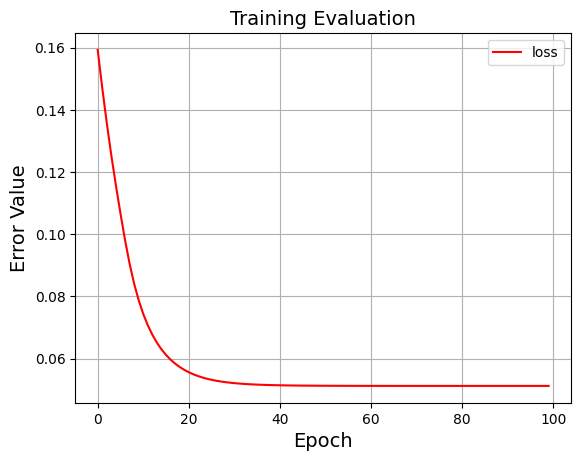

In [138]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [139]:
predictions = model.forward(x_test)
predictions = predictions.detach().cpu().numpy()

In [140]:
def reverse_ohe(preds):
    ohe = []

    for i in preds:
        if i[0] > i[1]:
            ohe.append([1, 0])
        else:
            ohe.append([0, 1])
    return ohe

preds = reverse_ohe(predictions)
preds = np.array(preds)
preds.shape

(474, 2)

In [141]:
print("Accuracy: ", accuracy_score(y_test, preds))

Accuracy:  0.9514767932489452
